In [79]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
returns = lib.readcsv('data\ind30_m_vw_rets.csv')
returns.columns = returns.columns.str.strip()

size = lib.readcsv('data\ind30_m_size.csv', percentage = False)
size.columns = size.columns.str.strip()

firms = lib.readcsv('data\ind30_m_nfirms.csv', percentage = False)
firms.columns = firms.columns.str.strip()

In [81]:
marketsize_by_industry = size * firms

In [82]:
total_marketsize = marketsize_by_industry.sum(axis="columns")

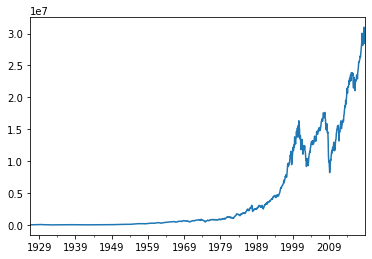

In [83]:
total_marketsize.plot()

In [84]:
capweight_by_industry = marketsize_by_industry.divide(total_marketsize, axis="rows")

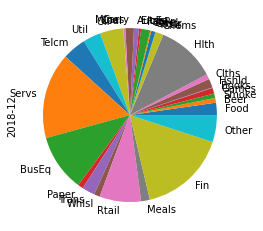

In [85]:
n = capweight_by_industry.shape[0]
capweight_by_industry.iloc[n-1].plot.pie()

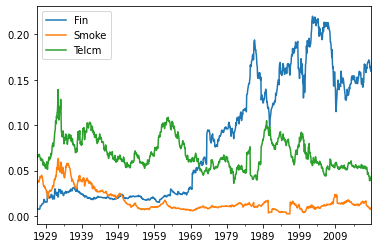

In [86]:
capweight_by_industry[["Fin", "Smoke", "Telcm"]].plot()

In [87]:
total_market_return = (capweight_by_industry * returns).sum(axis="columns")

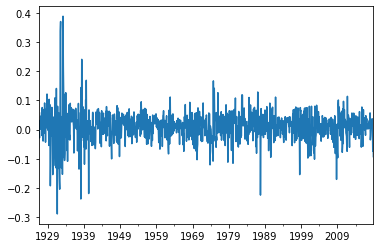

In [88]:
total_market_return.plot()

In [89]:
total_market_index = lib.drawdown(total_market_return).Wealth

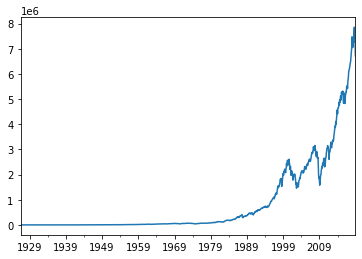

In [90]:
total_market_index.plot()

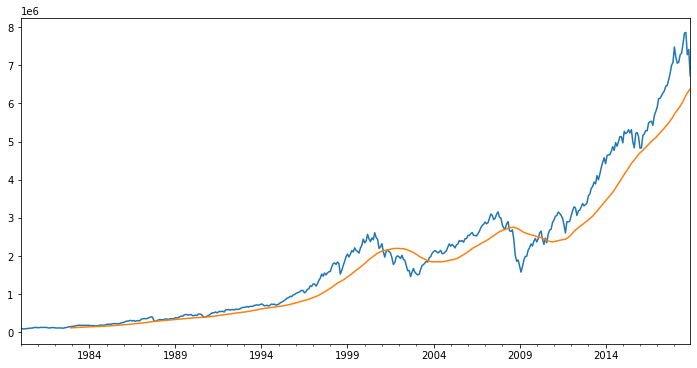

In [91]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot()

In [92]:
timeseries_36m_corr = returns.rolling(window=36).corr()
timeseries_36m_corr

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  \
1926-07 Food    nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Beer    nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Smoke   nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Games   nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Books   nan   nan    nan    nan    nan    nan    nan   nan    nan   
...             ...   ...    ...    ...    ...    ...    ...   ...    ...   
2018-12 Whlsl 0.475 0.357  0.123  0.510  0.803  0.419  0.570 0.740  0.786   
        Rtail 0.518 0.406  0.030  0.676  0.636  0.358  0.677 0.715  0.626   
        Meals 0.370 0.385  0.122  0.302  0.521  0.308  0.302 0.416  0.520   
        Fin   0.299 0.193  0.028  0.480  0.695  0.163  0.426 0.658  0.760   
        Other 0.437 0.377  0.224  0.332  0.558  0.391  0.467 0.645  0.713   

               Txtls  ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  \
1926-07 Food     nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Beer     nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Smoke    nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Games    nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Books    nan  ...    nan    nan    nan    nan    nan    nan    nan   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
2018-12 Whlsl  0.634  ...  0.648  0.567  0.543  0.764  0.829  1.000  0.745   
        Rtail  0.634  ...  0.562  0.763  0.628  0.657  0.631  0.745  1.000   
        Meals  0.492  ...  0.406  0.445  0.399  0.627  0.663  0.644  0.617   
        Fin    0.577  ...  0.421  0.585  0.518  0.671  0.761  0.746  0.612   
        Other  0.521  ...  0.608  0.460  0.434  0.774  0.757  0.768  0.620   

               Meals   Fin  Other  
1926-07 Food     nan   nan    nan  
        Beer     nan   nan    nan  
        Smoke    nan   nan    nan  
        Games    nan   nan    nan  
        Books    nan   nan    nan  
...              ...   ...    ...  
2018-12 Whlsl  0.644 0.746  0.768  
        Rtail  0.617 0.612  0.620  
        Meals  1.000 0.503  0.605  
        Fin    0.503 1.000  0.735  
        Other  0.605 0.735  1.000  

[33300 rows x 30 columns]

In [93]:
timeseries_36m_corr.index.names = ["date","industry"]
timeseries_36m_corr.tail()

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  \
date    industry                                                               
2018-12 Whlsl    0.475 0.357  0.123  0.510  0.803  0.419  0.570 0.740  0.786   
        Rtail    0.518 0.406  0.030  0.676  0.636  0.358  0.677 0.715  0.626   
        Meals    0.370 0.385  0.122  0.302  0.521  0.308  0.302 0.416  0.520   
        Fin      0.299 0.193  0.028  0.480  0.695  0.163  0.426 0.658  0.760   
        Other    0.437 0.377  0.224  0.332  0.558  0.391  0.467 0.645  0.713   

                  Txtls  ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  \
date    industry         ...                                                    
2018-12 Whlsl     0.634  ...  0.648  0.567  0.543  0.764  0.829  1.000  0.745   
        Rtail     0.634  ...  0.562  0.763  0.628  0.657  0.631  0.745  1.000   
        Meals     0.492  ...  0.406  0.445  0.399  0.627  0.663  0.644  0.617   
        Fin       0.577  ...  0.421  0.585  0.518  0.671  0.761  0.746  0.612   
        Other     0.521  ...  0.608  0.460  0.434  0.774  0.757  0.768  0.620   

                  Meals   Fin  Other  
date    industry                      
2018-12 Whlsl     0.644 0.746  0.768  
        Rtail     0.617 0.612  0.620  
        Meals     1.000 0.503  0.605  
        Fin       0.503 1.000  0.735  
        Other     0.605 0.735  1.000  

[5 rows x 30 columns]

In [94]:
trailing_36m_corr_group = timeseries_36m_corr.groupby(level="date")
trailing_36m_corr_group.tail()

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  \
date    industry                                                               
1926-07 Whlsl      nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Rtail      nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Meals      nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Fin        nan   nan    nan    nan    nan    nan    nan   nan    nan   
        Other      nan   nan    nan    nan    nan    nan    nan   nan    nan   
...                ...   ...    ...    ...    ...    ...    ...   ...    ...   
2018-12 Whlsl    0.475 0.357  0.123  0.510  0.803  0.419  0.570 0.740  0.786   
        Rtail    0.518 0.406  0.030  0.676  0.636  0.358  0.677 0.715  0.626   
        Meals    0.370 0.385  0.122  0.302  0.521  0.308  0.302 0.416  0.520   
        Fin      0.299 0.193  0.028  0.480  0.695  0.163  0.426 0.658  0.760   
        Other    0.437 0.377  0.224  0.332  0.558  0.391  0.467 0.645  0.713   

                  Txtls  ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  \
date    industry         ...                                                    
1926-07 Whlsl       nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Rtail       nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Meals       nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Fin         nan  ...    nan    nan    nan    nan    nan    nan    nan   
        Other       nan  ...    nan    nan    nan    nan    nan    nan    nan   
...                 ...  ...    ...    ...    ...    ...    ...    ...    ...   
2018-12 Whlsl     0.634  ...  0.648  0.567  0.543  0.764  0.829  1.000  0.745   
        Rtail     0.634  ...  0.562  0.763  0.628  0.657  0.631  0.745  1.000   
        Meals     0.492  ...  0.406  0.445  0.399  0.627  0.663  0.644  0.617   
        Fin       0.577  ...  0.421  0.585  0.518  0.671  0.761  0.746  0.612   
        Other     0.521  ...  0.608  0.460  0.434  0.774  0.757  0.768  0.620   

                  Meals   Fin  Other  
date    industry                      
1926-07 Whlsl       nan   nan    nan  
        Rtail       nan   nan    nan  
        Meals       nan   nan    nan  
        Fin         nan   nan    nan  
        Other       nan   nan    nan  
...                 ...   ...    ...  
2018-12 Whlsl     0.644 0.746  0.768  
        Rtail     0.617 0.612  0.620  
        Meals     1.000 0.503  0.605  
        Fin       0.503 1.000  0.735  
        Other     0.605 0.735  1.000  

[5550 rows x 30 columns]

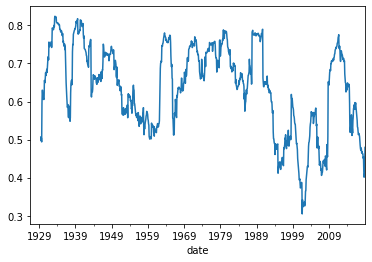

In [95]:
trailing_36m_corr = trailing_36m_corr_group.apply(lambda cormat: cormat.values.mean())
trailing_36m_corr.plot()

In [96]:
trailing_annualized_total_market_return = total_market_return.rolling(window=36).aggregate(lib.annualized_return)

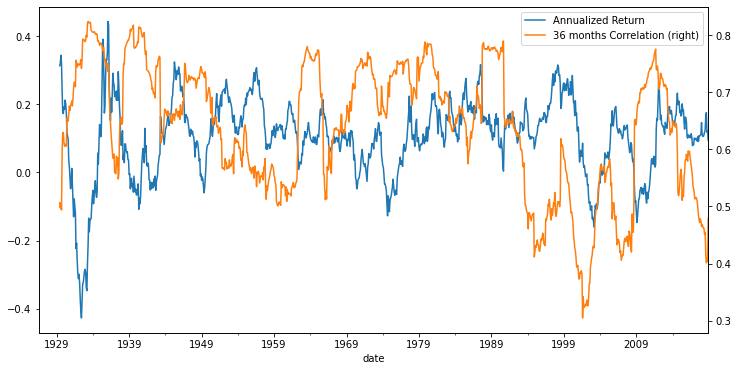

In [97]:
trailing_annualized_total_market_return.plot(figsize=(12,6), legend=True, label="Annualized Return")
trailing_36m_corr.plot(label="36 months Correlation", legend=True, secondary_y=True)

In [98]:
trailing_annualized_total_market_return.corr(trailing_36m_corr)

-0.28010065062884093